# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# read the first five lines of the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# check for the number of rows and column
df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [4]:
# check the number of unique users in the dataset
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
# calculate the proportion of teh users that are converted
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
len(df.query('group == "treatment" & landing_page != "new_page"or group=="control" and landing_page=="new_page"'))

3893

**f.** Do any of the rows have missing values?

In [7]:
# check for the missing avlues in the dataset
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# returns all indexes for which the treatment and new page do not align.
indexes=df.query('group=="treatment" and landing_page!="new_page" or group=="control" and landing_page!="old_page"').index.values
indexes

array([    22,    240,    308, ..., 294252, 294253, 294331])

In [9]:
# returns all indexes for which the treatment and new page do not align.
df2=df.drop(indexes)

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
# check for the numbers of unique users in the dataset
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# check for duplicated users in df2
df2[df2.duplicated(['user_id'])]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [13]:
# return the rows of duplicated users in df2
df2[df2.duplicated(subset="user_id", keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id..
df2.drop_duplicates(subset ="user_id",keep = 'first', inplace = True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(subset="user_id", keep=False)]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [15]:
# calculate the probability of the converted indidviduals regardless of the page they  received
df2['converted'].mean()

0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# calculate the probability of the converted individual in the control group
control_convert = df2.query('group=="control"').converted.mean()
control_convert

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# calculate the probability of the converted individual in the treatment group
treatment_convert = df2.query('group=="treatment"').converted.mean()
treatment_convert

0.11880806551510564

In [18]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_convert - control_convert
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [19]:
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Observation** <br><br>
Based on the analysis presented above, **there is insufficient evidence to conclude that the new treatment page results in a higher conversion rate**.
12.04 % of those who received the old page were converted, compared to 11.88 % of those who received the new page. If we had to draw a conclusion, it would seem that control pages have a higher conversion rate, while the new page did not increase the conversion rate.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  


>**Answer**
**Null hypothesis**: The conversion rate of the old page is greater than or equal to that of the newpage.**$p_{new}$** <= **$p_{old}$** <br>
**Alternative hypothesis**: The conversion rate of the old page is less than the conversion rate of the new page. **$p_{new}$** > **$p_{old}$**

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [20]:
# Calculate the conversion rate for the "converted" probability (or rate) 
# for the new pages, 𝑝𝑛𝑒𝑤  under the null hypothesis
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [21]:
# Calculate the conversion rate for the "converted" probability (or rate) 
# for the old pages, 𝑝old  under the null hypothesis
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [22]:
# Calculate the number of userd in the treatment group
n_new=df2.query('group=="treatment"').count()[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [23]:
# Calculate the number of userd in the control group
n_old=df2.query('group=="control"').count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>



In [24]:
# Simulate Sample for the treatment Group
# Simulate  𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  
# under the null hypothesis.
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted.mean()

0.11849150092904824

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [25]:
# Simulate Sample for the treatment Group
# Simulate  𝑛old  transactions with a conversion rate of  𝑝old 
# under the null hypothesis.
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.12020044880708179

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [26]:
diff_page_converted = new_page_converted.mean() - old_page_converted.mean()
diff_page_converted

-0.001708947878033551


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [27]:
# Sampling distribution
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

In [28]:
# convert to numpy array
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

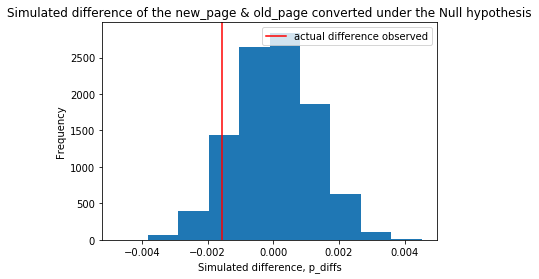

In [29]:
# Plot a histogram of the p_diffs
plt.hist(p_diffs)
plt.xlabel('Simulated difference, p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated difference of the new_page & old_page converted under the Null hypothesis');
plt.axvline(obs_diff, color='red', label='actual difference observed')
plt.legend()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
# Calculate the proportion of the p_diffs 
# greater than the actual difference observed
(p_diffs > obs_diff).mean()

0.9103

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Answer** <br><br>
The observed difference is greater than 91.03% of the p-diffs observed in the df2 data. This value is called the **p-value** in scientific studies. Since the p-value, 0.9024, is greater than the Type I error, 0.05, we cannot reject the null hypothesis and do not have sufficient evidence to conclude that the new page has a higher conversion rate than the old page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance.

In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]

# number of individuals who were shown the old_page
n_old = df2.query('landing_page=="old_page"').count()[0]

# number of individuals who received new_page
n_new = df2.query('landing_page=="new_page"').count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
print('The number of conversions with the old_page: ', convert_old)
print('The number of conversions with the new_page: ', convert_new)
print('The number of individuals who were shown the old_page: ', n_old)
print('The number of individuals who were shown the new_page: ', n_new)

The number of conversions with the old_page:  17489
The number of conversions with the new_page:  17264
The number of individuals who were shown the old_page:  145274
The number of individuals who were shown the new_page:  145310


**m.** Now compute your test statistic and p-value.


In [33]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Answer** <br><br>
Since $H_1$ is defined as $(p_{new} > p_{old})$ therefore it is right tailed <br><br>
The $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval is 1.645 for one-tailed tests. Since $Z_{score}$, -1.311 < $Z_{\alpha}$, 1.645 null being that the conversion rate of the old page is equal to or greater than the converted rate of the new page cannot be rejected. <br><br>
The p-value of 0.91 is greater than the significance threshold of 0.05. Therefore, we cannot say with 95% confidence level that the new page's conversion rate is greater than the old page's. <br><br>
This also agrees with the parts **j.** and **k.** above even when the p-values are different


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Answer** <br><br>
**Logistics Regression** will be used since the dependent variable is a binary variable (converted vs not converted).

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [34]:
# change the column group to dummy variable
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.rename(columns={'treatment': 'ab_page'})
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [35]:
import statsmodels.api as sm

df2['intercept']=1
# Set the "control" as the baseline
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-09 06:45 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

> **Answers**<br>
**Null hypothesis**: The conversion rate of the old page is the same as that oof the conversion rate of the new_page.<br>
**Alternative hypothesis**: The conversion rate of the old page is different to the conversion rate of the new_page. This assumes a two-tailed test. <br><br>
The associated p-value for ab page is 0.19. It exceeds the Type I eeror 0.05 Therefore, the coefficient is not statistical significance.<br> <br>
The values are different because in part 2, we randomly sampled the data 10,000 times. The samples may have overlapped or been mutually exclusive in some ways, which led to different p-values than those found in logistic regression.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer** <br><br>
To identify additional potential conversion rate influences, it is prudent to take into account additional variables. Taking into account additional explanatory variables can also improve the r-squared values, thereby enhancing the reliability of our hypotheses. <br><br>
The disadvantages is that when there are many factors in a logistic regression model, the model becomes more complicated and the analysis is less useful.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')

In [38]:
# Join with the df2 dataframe
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1


In [39]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
# Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results.

In [41]:
# Fit your model, and summarize the results
df_new['intercept'] = 1

# Set "CA" as the baseline by removing the "CA" column
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-05-09 06:45 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [42]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [43]:
1/np.exp(results.params)

intercept    7.614303
ab_page      1.015056
UK           0.950621
US           0.960062
dtype: float64

>**Conclusion** <br><br>
- All of the p-values are greater than 0.05 therefore none of the variables are statistically significant.
- There's no significant impact of the countries and new page on conversion rates. The company shouldn't implement this new page as there is no conclusive evidence that it is better than the old page.
- If an individual is in canada, they are 0.951 more likely to be converted than if they aare in UK, holding all other variables constant.
- If an individual is in canada, they are 0.96 more likely to be converted than if they aare in US, holding all other variables constant.
- For every one point increase in ab_page, an individual is 0.985 more likely to be converted, holding all other variables constant.
- By looking at the odds ratio of the interaction between country and ab_page, we have an equal chance of the ab_page converting users in each country(0.985, 1.052, 1.042). We thus fail to reject the null hypothesis; the new page does not convert more than the old page.